In [7]:
import numpy as np
import matplotlib.pyplot as plt

class diffusivity:
    BOLTZMANN_CONSTANT = 1.380651e-23
    BOLTZMANN_CONSTANT_EV = 8.617e-5
    R = 8.314

    def __init__(self, temperature: float, fission_rate: float, oxygen_to_metal_ratio: float):
        self.temperature = temperature
        self.fission_rate = fission_rate
        self.x = oxygen_to_metal_ratio

    def uranium_dioxide(self) -> None:
        """Calculates xenon diffusivity in uranium dioxide using Turnbull's model."""
        D1 = 7.6e-10 * np.exp(-4.86e-19 / (self.temperature * self.BOLTZMANN_CONSTANT))
        D2 = 4.0 * 1.41e-25 * np.sqrt(self.fission_rate) * np.exp(-1.91e-19 / (self.BOLTZMANN_CONSTANT * self.temperature))
        D3 = 8e-40 * self.fission_rate * np.ones_like(self.temperature)
        self.d_turnbull = D1 + D2 + D3

    def uranium_nitride(self) -> None:
        """Calculates Xe diffusivity in uranium nitride."""

        T = self.temperature
        
        D1 = 2.37e-14 * np.exp(-18800 / T)
        D2 = 8.22e-35 * self.fission_rate
        D3 = 1e-22 * self.fission_rate * T**-2 * np.exp(-18400 / T) * (1.37 * T**0.41 / 100)**-2
        self.d_weinstein = D1 + D2 + D3
        self.d_qian = 4.05e-7 * np.exp(-2.15e5 / (self.R * T))
        self.d_biddle = 3e-12 * np.exp(-2.41e5 / (self.R * T))

    def xe_matthews_et_al(self) -> np.ndarray:
        """Calculates xenon diffusivity using Matthews et al.'s model."""
        D1 = 2.22e-7 * np.exp(-3.26 / (self.temperature * self.BOLTZMANN_CONSTANT_EV)) / \
             (1 + 29 * np.exp(-1.84 / (self.BOLTZMANN_CONSTANT_EV * self.temperature)))
        D2 = 2.82e-22 * np.sqrt(self.fission_rate) * np.exp(-2 / (self.BOLTZMANN_CONSTANT_EV * self.temperature))
        D3 = 8.5e-40 * self.fission_rate * np.ones_like(self.temperature)
        return D1 + D2 + D3

    def xe_killeen_turnbull(self) -> None:
        """Calculates xenon diffusivity using Killeen and Turnbull's model."""
        s = 3e-10  # atomic jump distance
        jv = 1e13 * np.exp(-27800 / self.temperature)  # vacancy jump rate
        alpha_s = 1e15  # fixed sink strength
        Z = 100  # number of sites around a point defect for recombination
        S = np.exp(-74100 / self.temperature)  # Schottky energy barrier
        G = np.exp(-35800 / self.temperature)  # Frenkel energy barrier
        K = 2e-4  # defect/atom s damage rate

        Vu = S * G**-2 * (0.5 * self.x**2 + G + 0.5 * np.sqrt(self.x**4 + 4 * G * self.x**2))
        Vi = (alpha_s * s**2 + Z * Vu) / (2 * Z) * (np.sqrt(1 + 4 * K * Z / (jv * (alpha_s * s**2 + Z * Vu)**2)) - 1)
        
        self.D1 = 7.6e-10 * np.exp(-4.86e-19 / (self.temperature * self.BOLTZMANN_CONSTANT))
        self.D2 = 4.0 * 1.41e-25 * np.sqrt(self.fission_rate) * np.exp(-1.91e-19 / (self.BOLTZMANN_CONSTANT * self.temperature))
        self.D3 = 8e-40 * self.fission_rate * np.ones_like(self.temperature)
        self.D4 = s**2 * jv * Vu

        self.D_tot = self.D1 + self.D2 + self.D3 + self.D4

    def xe_lewis_2007(self) -> None:
        """Calculates xenon diffusivity using Lewis's 2007 model."""
        self.D1 = 7.6e-10 * np.exp(-4.86e-19 / (self.temperature * self.BOLTZMANN_CONSTANT))
        self.D2 = 4.0 * 1.41e-25 * np.sqrt(self.fission_rate) * np.exp(-1.91e-19 / (self.BOLTZMANN_CONSTANT * self.temperature))
        self.D3 = 8e-40 * self.fission_rate * np.ones_like(self.temperature)
        self.D4 = self.x**2 * 2.22e-8 * np.exp(-20230 / self.temperature)
        self.D_tot = self.D1 + self.D2 + self.D3 + self.D4

    def vacancies_kogai1997(self) -> float:
        """Calculates vacancy diffusivity using Kogai's 1997 model."""
        self.D = 6.9e-4 * np.exp(-77000 / (1.987 * self.temperature))
        return self.D

    def vacancies_white2004(self) -> float:
        """Calculates vacancy diffusivity using White's 2004 model."""
        self.D = 3.5 / 5 * 8.86e-6 * np.exp(-4.17e4 / self.temperature)
        return self.D

    def vacancies_reynolds(self) -> float:
        """Calculates vacancy diffusivity using Reynolds's model."""
        self.D = 6.9e-4 * np.exp(-5.35e-19 / (self.temperature * self.BOLTZMANN_CONSTANT))
        return self.D

    def diffusivity_murhpy(self) -> None:
        """Calculates diffusivity using Murphy's model."""
        self.D_100 = 2e-5 * np.exp(-1.62 / (self.temperature * self.BOLTZMANN_CONSTANT_EV))
        self.D_bulk = 3.35e-6 * np.exp(-3.64 / (self.temperature * self.BOLTZMANN_CONSTANT_EV))

    def xe_diffusivity_dislocations(self) -> float:
        """Calculates xenon diffusivity at dislocations."""
        self.D = 3e-8 * np.exp(-241000 / (self.temperature * self.R))
        return self.D


In [8]:
# D = diffusivity()

# temperature = np.linspace(800, 2000)

# D.parameters(temperature, 1e19, 0.004)

# D.xe_killeen_turnbull()

# plt.plot(temperature, D.D1, label="D1")
# plt.plot(temperature, D.D2, label="D2")
# plt.plot(temperature, D.D3, label="D3")
# plt.plot(temperature, D.D4, label="D4")
# plt.plot(temperature, D.D_tot, label="Killeen and Turnbull")

# plt.xlabel('Temperature (K)')
# plt.ylabel('Diffusivity (m2 s-1)')
# plt.legend()
# plt.grid()
# plt.yscale("log")
# plt.show()

# D.xe_lewis_2007()

# plt.plot(temperature, D.D1, label="D1")
# plt.plot(temperature, D.D2, label="D2")
# plt.plot(temperature, D.D3, label="D3")
# plt.plot(temperature, D.D4, label="D4")
# plt.plot(temperature, D.D_tot, label="Lewis et al. (2007)")

# plt.xlabel('Temperature (K)')
# plt.ylabel('Diffusivity (m2 s-1)')
# plt.legend()
# plt.grid()
# plt.yscale("log")
# plt.show()




In [9]:
# Vu = sym.Symbol("Vu")
# S = sym.Symbol("S")
# G = sym.Symbol("G")
# x = sym.Symbol("x")
# T = sym.Symbol("T")

# Vu = S/G**2 * (1/2*x**2 + G + 1/2*(x**4+4*G*x**2)**0.5)
# Vu

# Du = sym.Symbol("Du")
# Du = 1e-3 * sym.exp(-140 / 8.314 / T)
# Du


In [10]:
# vacancy_diffusivity = diffusivity()

# temperature = np.linspace(800, 2000)

# D.parameters(temperature, 1e19, 0.004)

# kogai = D.vacancies_kogai1997()
# white = D.vacancies_white2004()
# reynolds = D.vacancies_reynolds()

# plt.plot(temperature, kogai, '-o')
# plt.plot(temperature, white)
# plt.plot(temperature, reynolds)

# plt.xlabel('Temperature (K)')
# plt.ylabel('Diffusivity (m2 s-1)')
# plt.legend(['Kogai 1997', 'White 2004', 'Reynolds and Burton 1979'])
# plt.grid()
# plt.yscale("log")
# plt.show()


In [11]:
# D = diffusivity()

# temperature = np.linspace(1000, 2200)

# D.parameters(temperature, 1e19, 0)

# turnbull = D.xe_turnbull_diffusivity()
# matthews = D.xe_matthews_et_al()

# plt.plot(10000/temperature, turnbull)
# plt.plot(10000/temperature, matthews)

# temp_points = [1273, 1373, 1473, 1573, 1673, 1773, 1873, 1973, 2073]
# temp_points_inverse = [10000 / temp for temp in temp_points]
# colors = np.linspace(0, 1, len(temp_points))
# for temp, color in zip(temp_points_inverse, colors):
#     plt.scatter(temp, 1e-15, color=plt.cm.RdBu(color), label=f'Temperature = {int(10000 / temp)} K')

# plt.xlabel('Temperature (K)')
# plt.ylabel('Diffusivity (m${}^2$ s${}^{-1}$)')
# plt.legend(['Turnbull et al. 1988', 'Matthews et al. 2020', 'Temperature = 1273 K'])
# plt.grid()
# plt.yscale("log")
# plt.show()


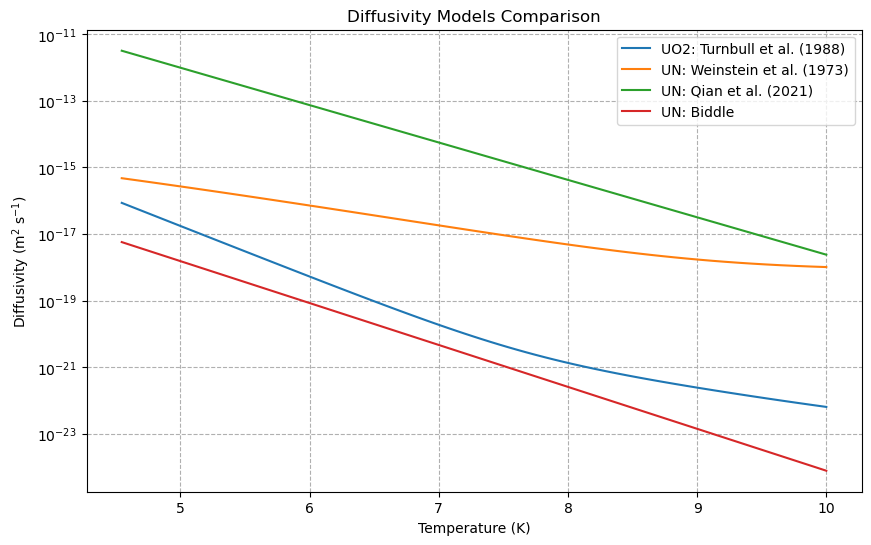

In [12]:
# Define temperature range and create an instance of Diffusivity
temperature_range = np.linspace(1000, 2200, 100)
diffusivity_model = diffusivity(temperature_range, 1e16, 0)

# Calculate diffusivities
diffusivity_model.uranium_dioxide()
turnbull_diffusivity = diffusivity_model.d_turnbull

diffusivity_model.uranium_nitride()
weinstein_diffusivity = diffusivity_model.d_weinstein
qian_diffusivity = diffusivity_model.d_qian
biddle_diffusivity = diffusivity_model.d_biddle

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(10000/temperature_range, turnbull_diffusivity, label='UO2: Turnbull et al. (1988)')
plt.plot(10000/temperature_range, weinstein_diffusivity, label='UN: Weinstein et al. (1973)')
plt.plot(10000/temperature_range, qian_diffusivity, label='UN: Qian et al. (2021)')
plt.plot(10000/temperature_range, biddle_diffusivity, label='UN: Biddle')

plt.xlabel('Temperature (K)')
plt.ylabel('Diffusivity (m$^2$ s$^{-1}$)')
plt.title('Diffusivity Models Comparison')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.yscale("log")
plt.show()